In [1]:
from sklearn.datasets import fetch_openml

In [2]:
#fetching data from the MINST
minst = fetch_openml('mnist_784', as_frame=False)

In [3]:
X, y = minst.data, minst.target

In [4]:
print("X shape: " + str(X.shape))
print("y shape: " + str(y.shape))

X shape: (70000, 784)
y shape: (70000,)


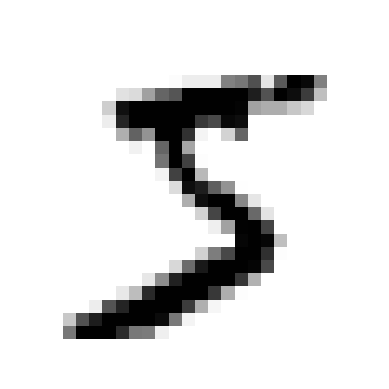

In [5]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [6]:
y[0]

'5'

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
#creating boolean array for every sample depending whether it is 5 or not
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [9]:
len(y_train_5)

60000

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
#Measuring Accuracy Using Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [13]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    
    
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


#Confusion Matrix


Train model → cross_val_predict → confusion_matrix → understand errors

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

[[53892,   687]
[ 1891,  3530]]

![alt text](image.png)
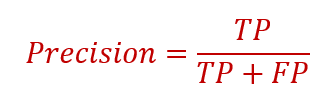

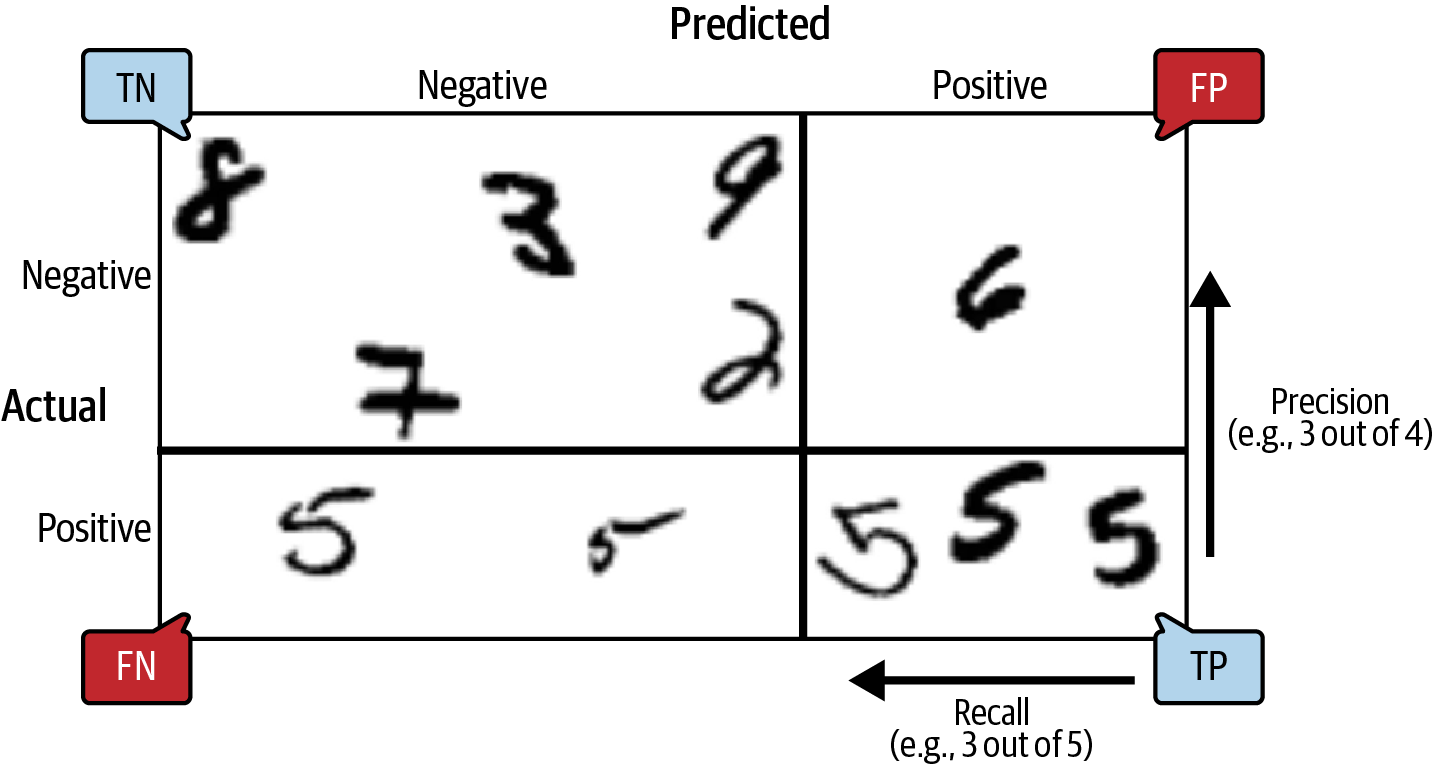

#Precision and Recall

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [21]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Percision claims that when the model predicts an image as 5, it is correct 83.7% of the time.

recall tells us the model detects 65.1% of all the actual 5 images in the dataset.


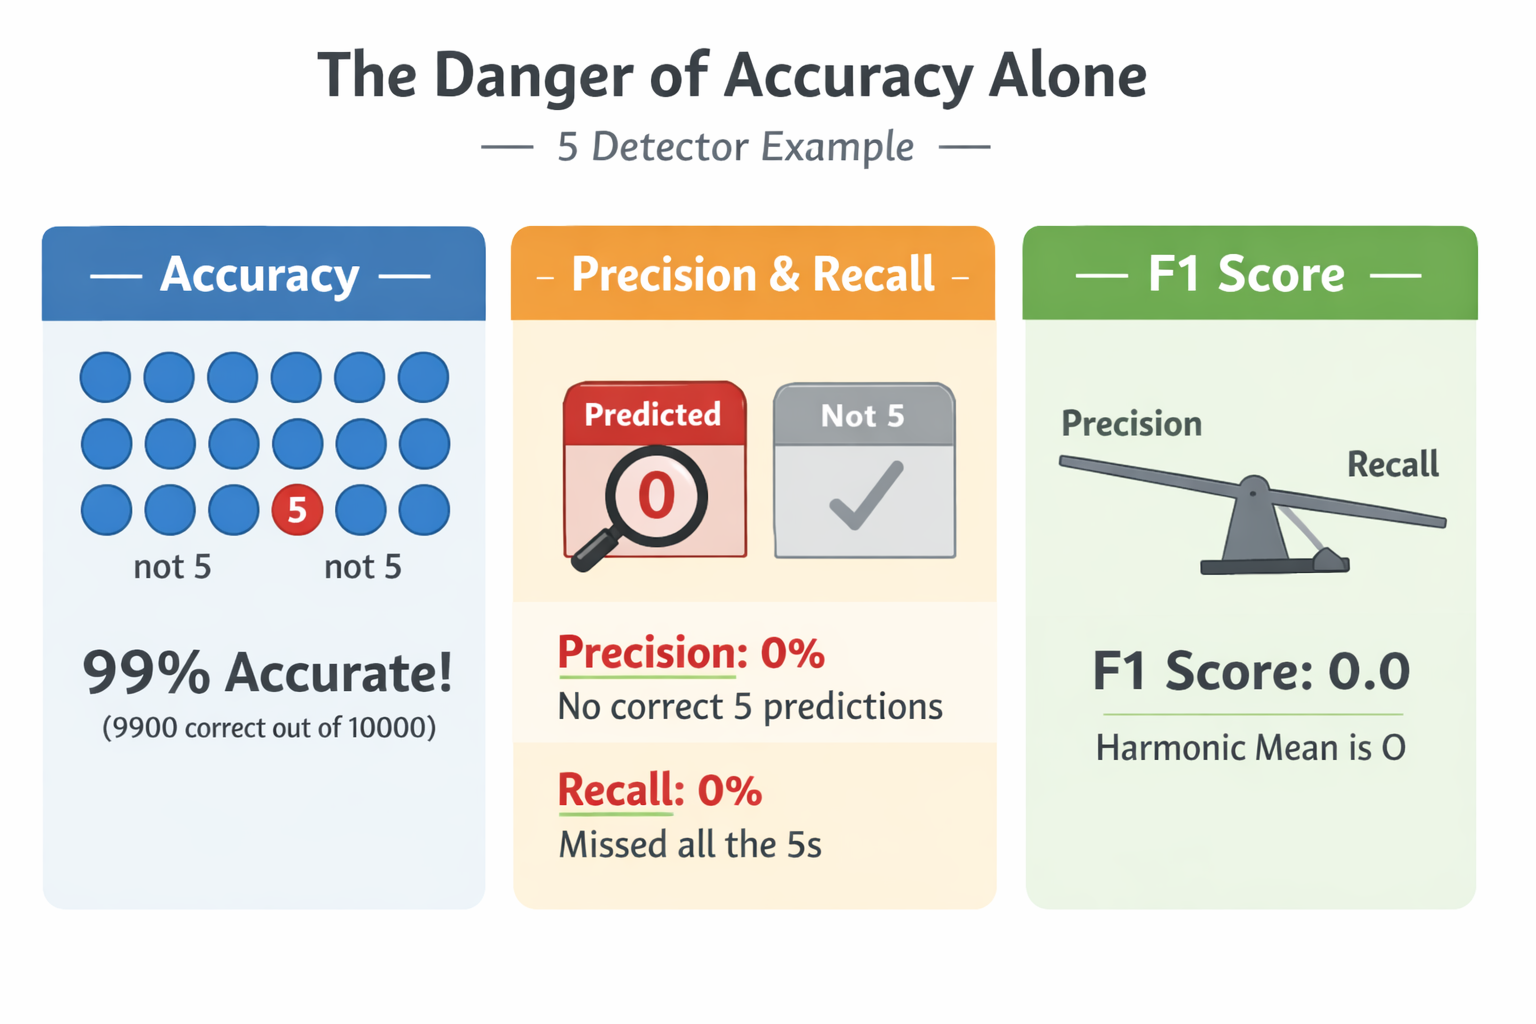

F1 score

